In [1]:
import math

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
venice = [45.436482, 12.331460] 

In [5]:
coords = []
colours = []
with open('flickrCoordinates2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        colour = [int(r[2][i:i+2], 16) for i in (0, 2, 4)]
        colours.append(colour)
        
        coords.append([eval(r[0]), eval(r[1])])

In [6]:
coords = np.array(coords)
colours = np.array(colours)

In [7]:
from haversine import haversine, Unit

refmain = venice
refsecond = coords[1]

haversine(refmain, refsecond, unit='m')


651.4059836136513

In [8]:
def convertDistToMetre(mainCoord, listofCoords):
    distances = []
    for i in listofCoords:
        distance = haversine(mainCoord, i, unit='m')
        distances.append(distance)
    return distances

In [9]:
distances = convertDistToMetre(venice, coords)

In [10]:
distances

[1214.0392209480995,
 651.4059836136513,
 1433.320829031802,
 438.9450336147344,
 438.9450336147344,
 1433.320829031802,
 438.9450336147344,
 620.7451196907584,
 698.1854167174658,
 735.2522098872755,
 762.9960203309483,
 122.24044699390494,
 551.9899351404114,
 689.2029360382379,
 286.71938690341767,
 564.1341012777336,
 453.8245119764892,
 213.3980559620787,
 213.3980559620787,
 213.3980559620787,
 213.3980559620787,
 453.8245119764892,
 438.9450336147344,
 631.614759191522,
 870.4022795010843,
 631.614759191522,
 896.0622417173641,
 647.4496861632446,
 1851.8834640765554,
 647.4496861632446,
 715.1873271224719,
 715.1873271224719,
 515.997392147884,
 647.4496861632446,
 562.5233804465889,
 687.8876316451044,
 687.8876316451044,
 698.5405399248224,
 698.5405399248224,
 698.5405399248224,
 1101.4011306877105,
 1101.4011306877105,
 1101.4011306877105,
 1101.4011306877105,
 1232.6075267819028,
 596.365052836315,
 596.365052836315,
 384.1233870822501,
 596.365052836315,
 596.365052836315

In [11]:
def get_bearing(lat1, long1, lat2, long2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    long1 = np.deg2rad(long1)
    long2 = np.deg2rad(long2)
    
    dLon = long2 - long1
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
  
    brng = math.atan2(y, x)
    brng = np.rad2deg(brng)
    brng = (brng + 360) % 360

    return brng

In [12]:
get_bearing(venice[0], venice[1], coords[2][0],coords[2][1])

283.7160649410513

In [13]:
def getListOfBearings(mainCoord,coordinates):
    bearings = []
    for c in coordinates:
        lat = c[0]
        lon = c[1]
        bearing = get_bearing(mainCoord[0],mainCoord[1],lat,lon)
        bearings.append(bearing)
    return bearings

In [14]:
bearings = getListOfBearings(venice,coords)

In [15]:
newPoints = []
for i in range(len(bearings)):
    angle = bearings[i]
    distance = distances[i]
    px = distance * math.sin(np.deg2rad(angle))
    py = distance * math.cos(np.deg2rad(angle))
    newPoints.append([px,py])

In [16]:
newPoints

[[913.8734485473633, -799.2036974641809],
 [610.7279317580221, -226.58585317322274],
 [-1392.446354096993, 339.8554838433595],
 [241.55295194489614, 366.50363428177224],
 [241.55295194489614, 366.50363428177224],
 [-1392.446354096993, 339.8554838433595],
 [241.55295194489614, 366.50363428177224],
 [567.2684402691164, -252.05360599391943],
 [632.5048027679909, -295.6358411836533],
 [644.2932305109579, -354.2344495695978],
 [719.580597292826, -253.70591447690907],
 [120.15889657719616, 22.462556724922457],
 [-223.0149288137843, -504.932896554085],
 [262.50456234253875, -637.2535145396059],
 [-240.63673399840235, -155.8908883702119],
 [488.92994171670324, -281.415700196946],
 [303.92578948258637, -337.02492809595725],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [203.4885156798382, 64.27405600093022],
 [303.92578948258637, -337.02492809595725],
 [241.55295194489614, 366.50363428177224],
 [-93.24979905249755, -6

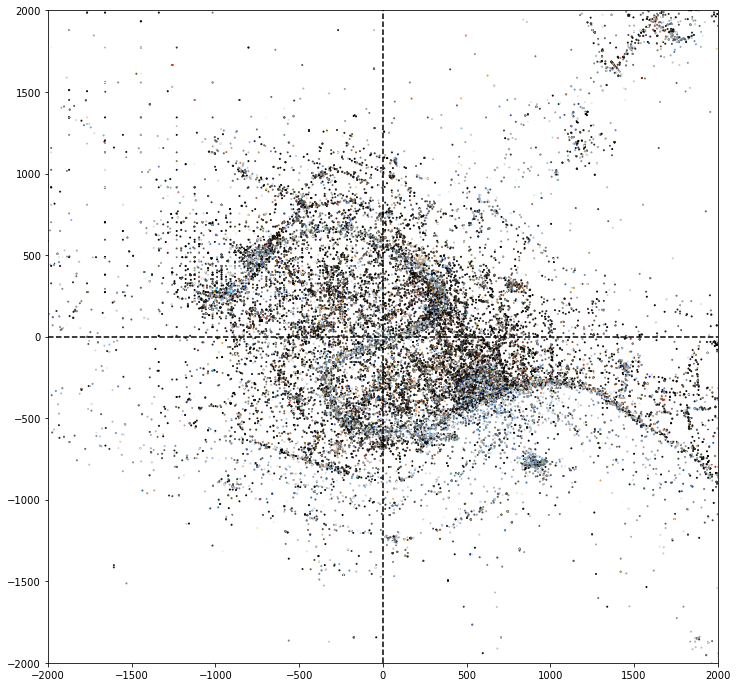

In [17]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = colours/255.0, s = 1)
plt.axvline(0,c= 'black', ls = '--')
plt.axhline(0,c= 'black', ls = '--')

plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

plt.show()

In [18]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
def testIfUniform(latrange, lonrange, coordinates):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and
        lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    pointsInRange = np.asarray(pointsInRange)
    scaler = MinMaxScaler()
    normalised = scaler.fit_transform(pointsInRange)
    print(stats.kstest(normalised[:,0], 'uniform'))
    print(stats.kstest(normalised[:,1], 'uniform'))

In [20]:
testIfUniform([45.43, 45.44], [12.33,12.34], coords)

KstestResult(statistic=0.16535934289443233, pvalue=0.0)
KstestResult(statistic=0.27126120825472594, pvalue=0.0)


In [21]:
testIfUniform([45.43, 45.432], [12.33,12.332], coords)

KstestResult(statistic=0.14698388860550907, pvalue=1.774478031226369e-09)
KstestResult(statistic=0.15796515015064194, pvalue=6.942005575754682e-11)


In [22]:
def testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and
        lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    if len(pointsInRange) > 2 and min(latrange[1]-latrange[0], lonrange[1]-lonrange[0]) > 0.00005:
        points = np.asarray(pointsInRange)
        scaler = MinMaxScaler()
        normalised = scaler.fit_transform(pointsInRange)
        
        xKS = stats.kstest(normalised[:,0], 'uniform')
        yKS = stats.kstest(normalised[:,1], 'uniform')
        if xKS[0] < statThresh and yKS[0] < statThresh and xKS[1] > pThresh and yKS[1] > pThresh:
            return True, pointsInRange
        else:
            return False, pointsInRange
    else:
        return True, pointsInRange

In [23]:
def evaluate(latrange, lonrange, coordinates, statThresh = 0.7, pThresh = 0.05):
    uniform, inrange = testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh)
    latdiff = latrange[1]-latrange[0]
    londiff = lonrange[1]-lonrange[0]
    
    if uniform:
        return [(latrange[0], lonrange[0]), (latdiff, londiff), inrange]
    else:
        a = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        b = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        c = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        d = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        
        return[a,b,c,d]

In [24]:
def unpack(tree, squares):
    if len(tree) == 4:
        for t in tree:
            unpack(t, squares)
    else:
        squares.append(tree)

In [25]:
squares = evaluate([45.43, 45.44], [12.33,12.34], coords, statThresh = 0.8, pThresh = 0.01)

In [26]:
blocks = []
unpack(squares, blocks)

In [27]:
len(blocks)

4054

In [28]:
print(blocks[0])

[(45.43, 12.33), (0.000625000000006537, 0.0006250000000012079), [array([45.430443, 12.330565]), array([45.430239, 12.330393]), array([45.430578, 12.330479]), array([45.430578, 12.330479]), array([45.430586, 12.330431]), array([45.430301, 12.330565]), array([45.430142, 12.33035 ]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430232, 12.330307]), array([45.430262, 12.330436]), array([45.430623, 12.330093]), array([45.430271, 12.330286])]]


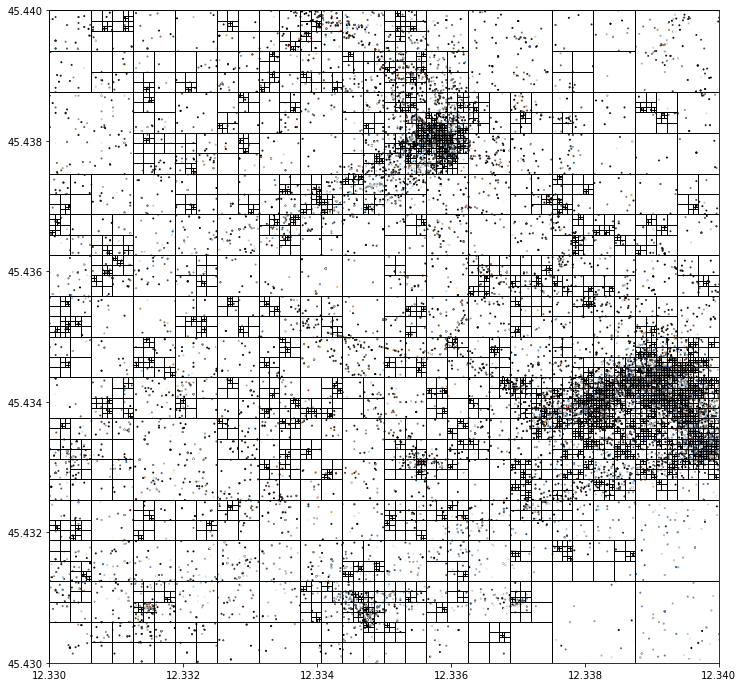

In [29]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
for b in blocks:
    ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                           edgecolor = 'black',
                           fill=False,lw=1))
plt.ylim([45.43, 45.44])
plt.xlim([12.33,12.34])
plt.show()

In [30]:
blocks.sort(key = lambda x:x[1][0]*x[1][1], reverse = True)

In [31]:
def sharesBorder(s1, s2):
    s1lim = [s1[0][0], s1[0][1], s1[0][0]+s1[1][0], s1[0][1]+s1[1][1]]
    s2lim = [s2[0][0], s2[0][1], s2[0][0]+s2[1][0], s2[0][1]+s2[1][1]]
    
    lBorders = [[(s1lim[0], s1lim[1]), (s1lim[2], s1lim[1])],
                [(s1lim[0], s1lim[3]), (s1lim[2], s1lim[3])],
                [(s1lim[0], s1lim[1]), (s1lim[0], s1lim[3])],
                [(s1lim[2], s1lim[1]), (s1lim[2], s1lim[3])]
                ]
    rBorders = [[(s2lim[0], s2lim[1]), (s2lim[2], s2lim[1])],
                [(s2lim[0], s2lim[3]), (s2lim[2], s2lim[3])],
                [(s2lim[0], s2lim[1]), (s2lim[0], s2lim[3])],
                [(s2lim[2], s2lim[1]), (s2lim[2], s2lim[3])]
                ]

    for lb in lBorders:
        for rb in rBorders:
            if checkOverlap(lb, rb):
                return True

def checkOverlap(a, b):
    if a[0][0] == b[0][0] == a[1][0] == b[1][0]:
        return a[1][1] > b[0][1] and b[1][1] > a[0][1]
    elif a[0][1] == b[0][1] == a[1][1] == b[1][1]:
        return a[1][0] > b[0][0] and b[1][0] > a[0][0]

In [32]:
def matchDensity(b1, b2, ta = 0.18511, tc = 0.00004):
    area1 = b1[1][0]*b1[1][1]
    area2 = b2[1][0]*b2[1][1]
    if len(b1[2]) and len(b2[2]):
        d1 = (area1/len(b1[2]))*100000
        d2 = (area2/len(b2[2]))*100000

        t = ta * min(d1, d2) + tc

        if abs(d1 - d2) < t:
                return True
        else:
            return False
    elif len(b1[2]) == len(b2[2]) == 0:
            return True
    else:
        return False

In [33]:
def addToGroup(group, blocks):
    added = True
    while added:
        found = False
        for g in group:
            for b in blocks:
                if sharesBorder(g,b) and matchDensity(g,b):
                    found = True
                    group.append(b)
                    blocks.remove(b)
        added = found

In [34]:
blocks = []
unpack(squares, blocks)

In [ ]:
groups = []
while len(blocks) > 0:
    group = [blocks[0]]
    blocks.remove(blocks[0])
    addToGroup(group,blocks)
    groups.append(group)    

In [ ]:
print(len(groups))

In [ ]:
print(groups[0])

In [ ]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))
#ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
for g in groups:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))
plt.ylim([45.43, 45.44])
plt.xlim([12.33,12.34])
plt.show()

In [ ]:
groups.sort(key = lambda x : len(x), reverse = True)

In [ ]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))

ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)

for g in groups[0:20]:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))



plt.ylim([45.43, 45.44])
plt.xlim([12.33,12.34])
plt.show()